In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")



In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

2n ===================================================




----------------------------------------------------

                  date  precipitation
date                                 
2016-08-23  2016-08-23           0.00
2016-08-24  2016-08-24           0.08
2016-08-25  2016-08-25           0.08
2016-08-26  2016-08-26           0.00
2016-08-27  2016-08-27           0.00
...                ...            ...
2017-08-19  2017-08-19           0.09
2017-08-20  2017-08-20            NaN
2017-08-21  2017-08-21           0.56
2017-08-22  2017-08-22           0.50
2017-08-23  2017-08-23           0.45

[2230 rows x 2 columns]
       date  precipitation
 2016-08-23           0.00
 2016-08-23            NaN
 2016-08-23           1.79
 2016-08-23           0.05
 2016-08-23           0.15
 2016-08-23           0.70
 2016-08-23           0.02
 2016-08-24           0.08
 2016-08-24           2.15
 2016-08-24           2.28
 2016-08-24            NaN
 2016-08-24           1.45
 2016-08-24      

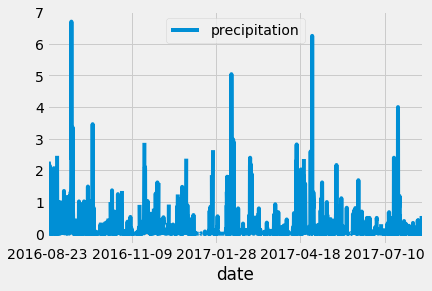

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp)
#print(results.all())
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print('2n ===================================================\n\n\n\n\n----------------------------------------------------\n')
#print(results)


# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])

# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
print(df)
#print(df.to_string(index=False))
df = df.sort_index()
print(df.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# How many stations are available in this dataset?
session.query()
count=session.query(func.count(Station.station))
print(count)
session.query(func.count(Station.station)).all()

SELECT count(station.station) AS count_1 
FROM station


[(9)]

In [13]:
# What are the most active stations?
session.query()
#session.query(Measurement.station, func.count(Measurement.station))
# List the stations and the counts in descending order.
#session.query(Measurement.station, func.count(Measurement.station)).\
#	group_by(Measurement.station)
#session.query(Measurement.station, func.count(Measurement.station)).\
#group_by(Measurement.station).order_by(func.count(Measurement.station).desc())

session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query()
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.query(Measurement.tobs)
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
print(results)
df = pd.DataFrame(results, columns=['tobs'])
print(df)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

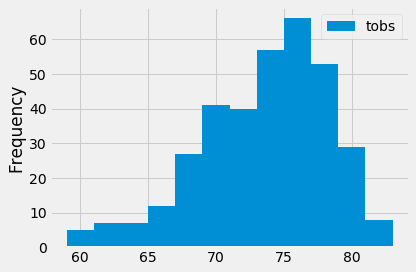

In [16]:
df.plot.hist(bins=12)
plt.tight_layout()

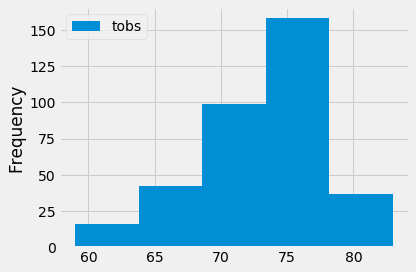

In [17]:
df.plot.hist(bins=5)
plt.tight_layout()

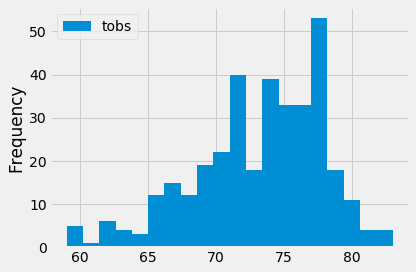

In [18]:
df.plot.hist(bins=20)
plt.tight_layout()

In [19]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge

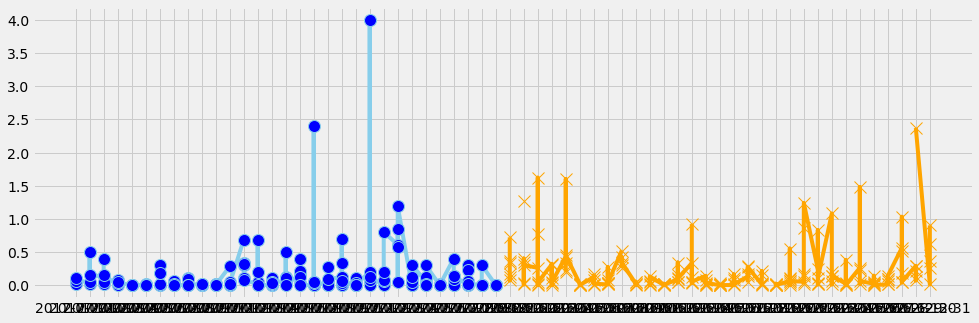

In [56]:
# Design a query to retrieve the month of July of precipitation data and plot the results. 
#Starting from the last data point in the database. 
MonthEnd = dt.date(2017, 7, 31)
# Calculate the date one year from the last date in data set.
MonthB   = dt.date(2017, 7, 1)
# Perform a query to retrieve the data and precipitation scores
resultsMonth1 = []
resultsMonht1 = session.query(Measurement.date, Measurement.prcp)
resultsMonth1 = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= MonthB, \
                    Measurement.date <= MonthEnd).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(resultsMonth1, columns=['date','precipitation'])
# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
#print(df)
#print(df.to_string(index=False))
df = df.sort_index()
# Design a query to retrieve the month of December of precipitation data and plot the results. 
#Starting from the last data point in the database. 
MonthEnd2 = dt.date(2016, 12, 31)
# Calculate the date one year from the last date in data set.
MonthB2   = dt.date(2016, 12, 1)
# Perform a query to retrieve the data and precipitation scores
resultsMonth2 = []
resultsMonht2 = session.query(Measurement.date, Measurement.prcp)
resultsMonth2 = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= MonthB2, \
                    Measurement.date <= MonthEnd2).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df2 = pd.DataFrame(resultsMonth2, columns=['date','precipitation'])
# Sort the dataframe by date
df2.set_index(df2['date'], inplace=True)
df2 = df2.sort_index()
#print(df.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
#df2.plot(figsize=(15,5))

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(15, 5))
plt.plot('date', 'precipitation', data=df, marker='o', markerfacecolor='blue',    markersize=12, color='skyblue', linewidth=4 )
plt.plot('date', 'precipitation', data=df2, marker='x', markerfacecolor='orange', markersize=12, color='orange',  linewidth=4 )
plt.show()